# **Data Description**

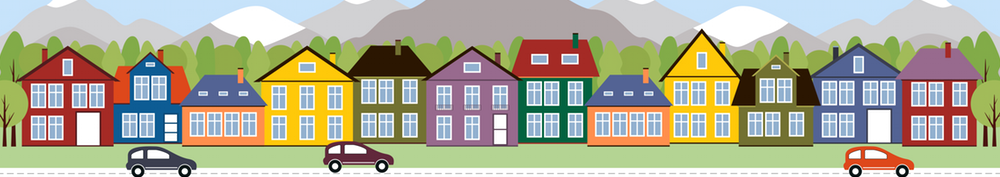


## File descriptions

   - train.csv - the training set
   - test.csv - the test set
   - data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
   - sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data fields

Here's a brief version of what you'll find in the data description file.

   - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
   - MSSubClass: The building class
   - MSZoning: The general zoning classification
   - LotFrontage: Linear feet of street connected to property
   - LotArea: Lot size in square feet
   - Street: Type of road access
   - Alley: Type of alley access
   - LotShape: General shape of property
   - LandContour: Flatness of the property
   - Utilities: Type of utilities available
   - LotConfig: Lot configuration
   - LandSlope: Slope of property
   - Neighborhood: Physical locations within Ames city limits
   - Condition1: Proximity to main road or railroad
   - Condition2: Proximity to main road or railroad (if a second is present)
   - BldgType: Type of dwelling
   - HouseStyle: Style of dwelling
   - OverallQual: Overall material and finish quality
   - OverallCond: Overall condition rating
   - YearBuilt: Original construction date
   - YearRemodAdd: Remodel date
   - RoofStyle: Type of roof
   - RoofMatl: Roof material
   - Exterior1st: Exterior covering on house
   - Exterior2nd: Exterior covering on house (if more than one material)
   - MasVnrType: Masonry veneer type
   - MasVnrArea: Masonry veneer area in square feet
   - ExterQual: Exterior material quality
   - ExterCond: Present condition of the material on the exterior
   - Foundation: Type of foundation
   - BsmtQual: Height of the basement
   - BsmtCond: General condition of the basement
   - BsmtExposure: Walkout or garden level basement walls
   - BsmtFinType1: Quality of basement finished area
   - BsmtFinSF1: Type 1 finished square feet
   - BsmtFinType2: Quality of second finished area (if present)
   - BsmtFinSF2: Type 2 finished square feet
   - BsmtUnfSF: Unfinished square feet of basement area
   - TotalBsmtSF: Total square feet of basement area
   - Heating: Type of heating
   - HeatingQC: Heating quality and condition
   - CentralAir: Central air conditioning
   - Electrical: Electrical system
   - 1stFlrSF: First Floor square feet
   - 2ndFlrSF: Second floor square feet
   - LowQualFinSF: Low quality finished square feet (all floors)
   - GrLivArea: Above grade (ground) living area square feet
   - BsmtFullBath: Basement full bathrooms
   - BsmtHalfBath: Basement half bathrooms
   - FullBath: Full bathrooms above grade
   - HalfBath: Half baths above grade
   - Bedroom: Number of bedrooms above basement level
   - Kitchen: Number of kitchens
   - KitchenQual: Kitchen quality
   - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
   - Functional: Home functionality rating
   - Fireplaces: Number of fireplaces
   - FireplaceQu: Fireplace quality
   - GarageType: Garage location
   - GarageYrBlt: Year garage was built
   - GarageFinish: Interior finish of the garage
   - GarageCars: Size of garage in car capacity
   - GarageArea: Size of garage in square feet
   - GarageQual: Garage quality
   - GarageCond: Garage condition
   - PavedDrive: Paved driveway
   - WoodDeckSF: Wood deck area in square feet
   - OpenPorchSF: Open porch area in square feet
   - EnclosedPorch: Enclosed porch area in square feet
   - 3SsnPorch: Three season porch area in square feet
   - ScreenPorch: Screen porch area in square feet
   - PoolArea: Pool area in square feet
   - PoolQC: Pool quality
   - Fence: Fence quality
   - MiscFeature: Miscellaneous feature not covered in other categories
   - MiscVal: $Value of miscellaneous feature
   - MoSold: Month Sold
   - YrSold: Year Sold
   - SaleType: Type of sale
   - SaleCondition: Condition of sale


## 1. Installing 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 2. EDA (Exploratory of Data Analysis)
### 2.1. Data Preperation

In [ ]:
def data():
    train_ = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
    test_ = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
    dataframe = pd.concat([train_, test_], ignore_index=True)
    return dataframe, train_, test_
df, train, test = data()


df.head()

Let's check NaN values:

In [ ]:
df.isnull().any().sum()

### 2.2. Categorical Variable Analysis

In [ ]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Kategorik Değişken Sayısı: ', len(cat_cols))


def cat_summary(data, categorical_cols, target, number_of_classes=10):
    var_count = 0
    vars_more_classes = []
    for var in categorical_cols:
        if len(df[var].value_counts()) <= number_of_classes:  # sınıf sayısına göre seç
            print(pd.DataFrame({var: data[var].value_counts(),
                                "Ratio": 100 * data[var].value_counts() / len(data),
                                "TARGET_MEDIAN": data.groupby(var)[target].median()}), end="\n\n\n")
            var_count += 1
        else:
            vars_more_classes.append(data[var].name)
    print('%d categorical variables have been described' % var_count, end="\n\n")
    print('There are', len(vars_more_classes), "variables have more than", number_of_classes, "classes", end="\n\n")
    print('Variable names have more than %d classes:' % number_of_classes, end="\n\n")
    print(vars_more_classes)



cat_summary(df, cat_cols, "SalePrice")

Variables with more than 10 classes:

In [ ]:

for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    print(df[col].value_counts())

### 2.3. Numerical Variable Analysis

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "Id"]
print('Sayısal değişken sayısı: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].hist(bins=20)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")


hist_for_nums(df, num_cols)

### 2.4. Target Analysis
Let's see statistical table of Target variable:

In [ ]:
df["SalePrice"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99])

Then look at the correlations between target and independent variables.

In [ ]:
def find_correlation(dataframe, corr_limit=0.60):          # our limit is 0.60 if you want you can change it
    high_correlations = []
    low_correlations = []
    for col in num_cols:
        if col == "SalePrice":
            pass

        else:
            correlation = dataframe[[col, "SalePrice"]].corr().loc[col, "SalePrice"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df)

## 3. Data Prepcoressing & Feature Engineering
### 3.1. Rare Analysis
First, observe the Rare values and perform operations.

In [ ]:
def rare_analyser(dataframe, target, rare_perc):
    rare_columns = [col for col in df.columns if len(df[col].value_counts()) <= 20
                    and (df[col].value_counts() / len(df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        print(var, ":", len(dataframe[var].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[var].value_counts(),
                            "RATIO": dataframe[var].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(var)[target].median()}), end="\n\n\n")


rare_analyser(df, "SalePrice", 0.01)

def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])
    return temp_df


df = rare_encoder(df, 0.01)
rare_analyser(df, "SalePrice", 0.01)

Then drop some values after Rare analysis and observe what you have:

In [ ]:

drop_list = ["Street", "Utilities", "LandSlope", "PoolQC", "MiscFeature"]
cat_cols = [col for col in df.columns if df[col].dtypes == 'O'
            and col not in drop_list]

for col in drop_list:
    df.drop(col, axis=1, inplace=True)

rare_analyser(df, "SalePrice", 0.01)

### 3.2. Label Encoding & One-Hot Encoding

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


df, new_cols_ohe = one_hot_encoder(df, cat_cols)
cat_summary(df, new_cols_ohe, "SalePrice")

### 3.3. Missing Values

In [ ]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(df)


Fill the missing values by "median" then apply all data:

In [ ]:
df = df.apply(lambda x: x.fillna(x.median()), axis=0)
missing_values_table(df)

### 3.4. Outliers

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names


has_outliers(df, num_cols)

Now, set thresholds(low and up limits) for outliers then use for outliers:

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(df, col)

has_outliers(df, num_cols)

### 3.5. Standardization

In [ ]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 20]


cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Id"
                   and col not in "SalePrice"
                   and col not in like_num]

df[cols_need_scale].head()
df[cols_need_scale].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T
hist_for_nums(df, cols_need_scale)


def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


for col in cols_need_scale:
    df[col] = robust_scaler(df[col])


df[cols_need_scale].head()
df[cols_need_scale].describe().T
hist_for_nums(df, cols_need_scale)

## Feature Engineering

In [ ]:
# Adding total sqfootage feature
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Overall quality of the house
df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]

df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)


df.loc[df["OverallQual"] < 2, "OverallQual"] = 2
df.loc[df["GarageCars"] > 4, "GarageCars"] = 4
df.loc[(df["OverallQual"] == 2) | (df["OverallQual"] == 3), "OverallQual"] = 3


# SalePrice 163k, Generally, 163k salepricants garage built value 2005
df.loc[df["GarageYrBlt"] == 2207, "GarageYrBlt"] = 2005
df.loc[df["Fireplaces"] == 4, "Fireplaces"] = 0
df.loc[df["Fireplaces"] == 3, "Fireplaces"] = 2


# NEW_1
df["new_area"] = df["GrLivArea"] + df["GarageArea"]

# NEW_2 
df["new_home"] = df["YearBuilt"]
df.loc[df["new_home"] == df["YearRemodAdd"], "new_home"] = 0
df.loc[df["new_home"] != df["YearRemodAdd"], "new_home"] = 1

# NEW_3  #Sum of Bath numbers
df["new_bath"] = df["FullBath"] + (df["HalfBath"] * 0.5)

df.head()

Last control before bridge :)

In [ ]:
missing_values_table(df)
has_outliers(df, num_cols)

## 5. Modelling
### 5.1. Liear, Ridge, Lasso and ElasticNet Regression Models

In [ ]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

X = train_df.drop('SalePrice', axis=1)
y = train_df[["SalePrice"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)



models = [('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('ElasticNet', ElasticNet())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append(result)
    names.append(name)
    msg = "%s: %f" % (name, result)
    print(msg)

df["SalePrice"].mean()

### 5.2. CatBoost Model

In [ ]:
from catboost import CatBoostRegressor

X = df.loc[:1459, :].drop(["SalePrice", "Id"], axis=1)
y = df.loc[:1459, "SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred, y_test)))


# TO CSV , Load to Kaggle

df1 = pd.DataFrame({"Id": df.loc[1460:, "Id"],
                      "SalePrice": catboost_model.predict(df.loc[1460:, :].drop(["SalePrice", "Id"], axis=1))})

df1.to_csv('submission_catboost.csv', index=False)


## Conclusion

We got 19K in this model estimation evaluation. A very successful modeling has been realized.


#### Note:

   - After this notebook, my aim is to prepare 'kernel' which is 'not clear' data set.

   - If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

   - Thank you for your suggestion and votes ;)